<h1> Clustering data by the longitude and latitude<h1>

/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


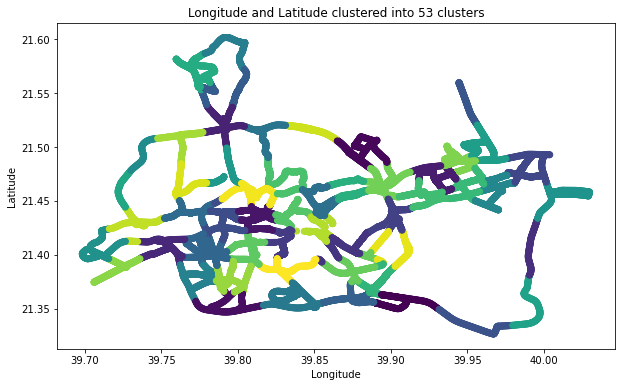

In [5]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

con = sqlite3.connect('../nokia.db')

df = pd.read_sql_query('SELECT * FROM Makkah_5g', con)

n_clusters = 53
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df[['Longitude', 'Latitude']])
df['cluster'] = kmeans.labels_

# Save the updated DataFrame back to the database
df.to_sql('Makkah_5g', con, if_exists='replace', index=False)
con.close()

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='o')
plt.title(f'Longitude and Latitude clustered into {n_clusters} clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
